In [28]:
# Group Members
# Shikash Algu: 2373769
# Byron Gomes: 0709942R
# Clarise Poobalan: 383321
# Nicolaas Cawood: 2376182

import numpy as np
import matplotlib.pyplot as plt
import gym

In [29]:
env = gym.make('CliffWalking-v0')

In [30]:
state = env.reset()
env.render()
state

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



36

In [31]:
action = env.action_space.sample()
action

3

In [36]:
def Sarsa_lam(env,episodes,epsilon,alpha,lambda_s,gamma):
    #Initialize Q(s,a) and e(s,a)
    Q=np.zeros((env.nS,env.nA))
    e=np.zeros((env.nS,env.nA))   
    hold_array=np.zeros((env.shape[0],env.shape[1],episodes))
    
    #Repeat (for each step of episode)    
    for episode in range(episodes):
        state = env.reset()
        action = env.action_space.sample()
        
        #repeat for each step in episode
       # while True:
        count=0
        for i in range(1000):        
            #Take action a, observe r and s'
            state_prime, reward, done, info = env.step(action)

            #Choose a' from s' using policy deriver from greedy
            action_prime=np.argmax(Q[state_prime])
            if np.random.random()<epsilon:
                action_prime=env.action_space.sample() # A random action with prob eps,#bandit algo.

            #Gamma
            delta=reward+gamma*Q[state_prime,action_prime]-Q[state,action]
            e[state,action]=e[state,action]+1

            #for all s,a
            for s in range(env.nS):
                for a in range(env.nA):
                    Q[s,a]=Q[s,a]+alpha*delta*e[s,a]
                    e[s,a]=gamma*lambda_s*e[s,a]

            state=state_prime
            action=action_prime

            if done:
              #  print("Done",count)
               # print(Q)
                hold_array[:,:,episode]=np.reshape(Q.max(axis=1),(4,12))
                break
            count+=1
            
    return hold_array

In [37]:
episodes=500
epsilon=0.1
alpha=0.5
gamma=1

Q_0=Sarsa_lam(env,episodes,epsilon,alpha,0,gamma)#(env,episodes,epsilon,alpha,lambda_s,gamma):,{0,0.3,0.5,0.7,0.9}
print("0")
Q_1=Sarsa_lam(env,episodes,epsilon,alpha,0.3,gamma)
print("1")
Q_2=Sarsa_lam(env,episodes,epsilon,alpha,0.5,gamma)
print("2")
Q_3=Sarsa_lam(env,episodes,epsilon,alpha,0.7,gamma)
print("3")
Q_4=Sarsa_lam(env,episodes,epsilon,alpha,0.9,gamma)


0
1
2
3


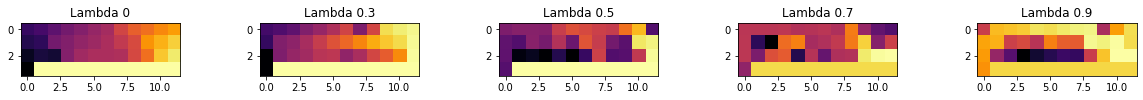

In [40]:
    plt.figure(figsize=(20,20))
    
    episode_to_view=100
    
    plt.subplot(1,5, 1).set_title("Lambda 0"),plt.imshow(Q_0[:,:,episode_to_view],cmap="inferno")
    plt.subplot(1,5, 2).set_title("Lambda 0.3"),plt.imshow(Q_1[:,:,episode_to_view],cmap="inferno")
    plt.subplot(1,5, 3).set_title("Lambda 0.5"),plt.imshow(Q_2[:,:,episode_to_view],cmap="inferno")
    plt.subplot(1,5, 4).set_title("Lambda 0.7"),plt.imshow(Q_3[:,:,episode_to_view],cmap="inferno")
    plt.subplot(1,5, 5).set_title("Lambda 0.9"),plt.imshow(Q_4[:,:,episode_to_view],cmap="inferno")

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)

In [35]:
# np.save("Q_0",Q_0)
# np.save("Q_1",Q_1)
# np.save("Q_2",Q_2)
# np.save("Q_3",Q_3)
# np.save("Q_4",Q_4)

In [ ]:
# Q_0=np.load("Q_0.npy")
# Q_1=np.load("Q_1.npy")
# Q_2=np.load("Q_2.npy")
# Q_3=np.load("Q_3.npy")
# Q_4=np.load("Q_4.npy")

To create the 500 images, run the below code

In [ ]:
# #{0,0.3,0.5,0.7,0.9}

# for i in range(Q_0.shape[2]):
#     plt.figure(figsize=(20,20))
#     plt.subplot(1,5, 1).set_title("Lambda 0"),plt.imshow(Q_0[:,:,i],cmap="inferno")
#     plt.subplot(1,5, 2).set_title("Lambda 0.3"),plt.imshow(Q_1[:,:,i],cmap="inferno")
#     plt.subplot(1,5, 3).set_title("Lambda 0.5"),plt.imshow(Q_2[:,:,i],cmap="inferno")
#     plt.subplot(1,5, 4).set_title("Lambda 0.7"),plt.imshow(Q_3[:,:,i],cmap="inferno")
#     plt.subplot(1,5, 5).set_title("Lambda 0.9"),plt.imshow(Q_4[:,:,i],cmap="inferno")

#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
#     hold="Vid"+str(i)+".png"
#     plt.savefig(hold)

Video created with images above using MS video creator